## Dataframe indicador Esperança de vida ao nascer

### ESPVIDA: Esperança de vida ao nascer (IDH)

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [3]:
!pip install --upgrade matplotlib --quiet

In [4]:
!pip install --upgrade seaborn --quiet

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import seaborn as sns

In [33]:
arquivo = "ADH_BASE_RADAR_2012-2021.xlsx"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx


In [34]:
life_exp_states = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\data\ADH_BASE_RADAR_2012-2021.xlsx')

In [35]:
life_exp_states.head(11)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,39808859,10304212,10609288,150994845,10076087,23924348,140385557,116461209,15249133,84277753
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,39055262,9986737,10521249,153338252,10336071,24034903,142817003,118782100,15820311,86108710
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,38765780,9687655,10446675,155356978,10224771,23840076,144910303,121070227,16425141,87308460
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,38189476,9314133,10401307,157576293,10394554,23851445,147174986,123323541,17060247,87756538
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,37694949,9288033,10375148,159692542,10242815,23779687,149317393,125537706,17728449,87110394
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,36965134,9178387,9987551,161671766,10306849,23975663,151684215,127708552,18431296,87616245
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,36460225,9041166,9641591,163492349,10093878,23998725,153850757,129852032,19168661,89281706
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,35999274,8951264,9389698,165329825,10194743,23952392,155940127,131987735,19941230,91579200
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,35750038,8751715,9357153,167005197,9806225,23521448,157648044,134126596,20748553,83946549
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,35708677,8708856,9273169,168679921,9546945,23143737,159406751,136263014,21590309,86645408


In [36]:
life_exp_states.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

In [37]:
life_exp_states = life_exp_states.drop(columns=['IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M', 'IDHM', 'ANOSEST'])

In [38]:
life_exp_states.head()

,ANO,AGREGACAO,CODIGO,NOME,ESPVIDA
0,2012,BRASIL,NaN,NaN,74.48
1,2013,BRASIL,NaN,NaN,74.80
2,2014,BRASIL,NaN,NaN,75.11
3,2015,BRASIL,NaN,NaN,75.40
4,2016,BRASIL,NaN,NaN,75.68


In [39]:
life_exp_states.rename(columns={'ANO': 'time'}, inplace=True)

In [40]:
life_exp_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   ESPVIDA    490 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.3+ KB


In [41]:
life_exp_states = life_exp_states.dropna(how='any')
life_exp_states.tail()

,time,AGREGACAO,CODIGO,NOME,ESPVIDA
485,2021,RM_RIDE,41.0,Região Metropolitana de Curitiba (PR),76.15
486,2021,RM_RIDE,42.0,Região Metropolitana de Florianópolis (SC),76.71
487,2021,RM_RIDE,43.0,Região Metropolitana de Porto Alegre (RS),75.05
488,2021,RM_RIDE,51.0,Região Metropolitana de Vale do Rio Cuiabá (MT),70.73
489,2021,RM_RIDE,52.0,Região Metropolitana de Goiânia (GO),70.48


In [42]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
life_exp_states = life_exp_states[~life_exp_states['AGREGACAO'].str.contains('RM_RIDE')]


In [43]:
life_exp_states.tail()

,time,AGREGACAO,CODIGO,NOME,ESPVIDA
275,2021,UF,43.0,Rio Grande do Sul,72.84
276,2021,UF,50.0,Mato Grosso do Sul,70.03
277,2021,UF,51.0,Mato Grosso,68.77
278,2021,UF,52.0,Goiás,68.28
279,2021,UF,53.0,Distrito Federal,73.16


In [44]:
life_exp_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 10 to 279
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       270 non-null    int64  
 1   AGREGACAO  270 non-null    object 
 2   CODIGO     270 non-null    float64
 3   NOME       270 non-null    object 
 4   ESPVIDA    270 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.7+ KB


In [45]:
life_exp_states['CODIGO'] = life_exp_states['CODIGO'].astype(int)

In [46]:
life_exp_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 10 to 279
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       270 non-null    int64  
 1   AGREGACAO  270 non-null    object 
 2   CODIGO     270 non-null    int32  
 3   NOME       270 non-null    object 
 4   ESPVIDA    270 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 11.6+ KB


In [47]:
life_exp_states.columns

Index(['time', 'AGREGACAO', 'CODIGO', 'NOME', 'ESPVIDA'], dtype='object')

In [48]:
life_exp_states = life_exp_states.drop(columns=['AGREGACAO', 'NOME'])

In [49]:
life_exp_states.head()

,time,CODIGO,ESPVIDA
10,2012,11,70.50
11,2012,12,72.47
12,2012,13,70.85
13,2012,14,70.10
14,2012,15,71.23


In [50]:
# Reorganizando o DataFrame para ter os estados como colunas e datas como índices
life_exp_states = life_exp_states.pivot(index='time', columns='CODIGO')['ESPVIDA']

# Removendo o nome da coluna de estados ('Código')
life_exp_states.columns.name = None

In [51]:
life_exp_states.head()

,11,12,13,14,15,16,17,21,22,23,...,32,33,35,41,42,43,50,51,52,53
time,,,,,,,,,,,,,,,,,,,,,
2012,70.50,72.47,70.85,70.10,71.23,72.77,72.11,69.34,70.19,72.78,...,76.78,74.90,76.80,75.76,77.70,76.62,74.35,73.16,73.41,76.87
2013,70.71,72.84,71.11,70.44,71.44,73.07,72.42,69.65,70.38,73.03,...,77.17,75.23,77.15,76.09,78.07,76.91,74.65,73.43,73.58,77.17
2014,70.91,73.21,71.36,70.77,71.64,73.37,72.71,69.96,70.57,73.26,...,77.54,75.56,77.47,76.40,78.42,77.21,74.94,73.69,73.75,77.47
2015,71.11,73.56,71.61,71.10,71.84,73.65,73.01,70.25,70.76,73.49,...,77.89,75.88,77.78,76.72,78.76,77.49,75.22,73.95,73.92,77.75
2016,71.30,73.89,71.85,71.41,72.03,73.92,73.29,70.54,70.94,73.72,...,78.22,76.18,78.07,77.02,79.09,77.77,75.49,74.20,74.09,78.02


In [52]:
life_exp_states.reset_index(inplace=True)

In [53]:
life_exp_states.head()

,time,11,12,13,14,15,16,17,21,22,...,32,33,35,41,42,43,50,51,52,53
0,2012,70.50,72.47,70.85,70.10,71.23,72.77,72.11,69.34,70.19,...,76.78,74.90,76.80,75.76,77.70,76.62,74.35,73.16,73.41,76.87
1,2013,70.71,72.84,71.11,70.44,71.44,73.07,72.42,69.65,70.38,...,77.17,75.23,77.15,76.09,78.07,76.91,74.65,73.43,73.58,77.17
2,2014,70.91,73.21,71.36,70.77,71.64,73.37,72.71,69.96,70.57,...,77.54,75.56,77.47,76.40,78.42,77.21,74.94,73.69,73.75,77.47
3,2015,71.11,73.56,71.61,71.10,71.84,73.65,73.01,70.25,70.76,...,77.89,75.88,77.78,76.72,78.76,77.49,75.22,73.95,73.92,77.75
4,2016,71.30,73.89,71.85,71.41,72.03,73.92,73.29,70.54,70.94,...,78.22,76.18,78.07,77.02,79.09,77.77,75.49,74.20,74.09,78.02


In [54]:
life_exp_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    10 non-null     int64  
 1   11      10 non-null     float64
 2   12      10 non-null     float64
 3   13      10 non-null     float64
 4   14      10 non-null     float64
 5   15      10 non-null     float64
 6   16      10 non-null     float64
 7   17      10 non-null     float64
 8   21      10 non-null     float64
 9   22      10 non-null     float64
 10  23      10 non-null     float64
 11  24      10 non-null     float64
 12  25      10 non-null     float64
 13  26      10 non-null     float64
 14  27      10 non-null     float64
 15  28      10 non-null     float64
 16  29      10 non-null     float64
 17  31      10 non-null     float64
 18  32      10 non-null     float64
 19  33      10 non-null     float64
 20  35      10 non-null     float64
 21  41      10 non-null     float64
 22  42   

In [56]:
#criando arquivo csv final
life_exp_states.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\life_exp_states.csv', encoding='UTF-8', index = False)

# Indicadores do Censo

In [38]:
arquivo3 = "Expectativa de estudo.xlsx"

caminho_completo3 = os.path.abspath(arquivo3)
print("O caminho completo para o arquivo é:", caminho_completo3)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\Expectativa de estudo.xlsx


In [39]:
exp_estudo_censo = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\Expectativa de estudo.xlsx')

In [40]:
exp_estudo_censo.head()

,Territorialidades,Expectativa de anos de estudo aos 18 anos de idade 1991,Expectativa de anos de estudo aos 18 anos de idade 2000,Expectativa de anos de estudo aos 18 anos de idade 2010
0,Brasil,8.16,8.76,9.54
1,Acre,6.56,6.77,8.69
2,Alagoas,6.62,6.54,9.07
3,Amapá,7.81,8.69,9.44
4,Amazonas,6.52,6.68,8.54


In [41]:
# Filtrar linhas onde a coluna 'Territorialidades' contenha 'Brasil'
exp_estudo_censo = exp_estudo_censo[~exp_estudo_censo['Territorialidades'].str.contains('Brasil')]

In [42]:
exp_estudo_censo.head()

,Territorialidades,Expectativa de anos de estudo aos 18 anos de idade 1991,Expectativa de anos de estudo aos 18 anos de idade 2000,Expectativa de anos de estudo aos 18 anos de idade 2010
1,Acre,6.56,6.77,8.69
2,Alagoas,6.62,6.54,9.07
3,Amapá,7.81,8.69,9.44
4,Amazonas,6.52,6.68,8.54
5,Bahia,5.75,7.28,8.63


In [43]:
exp_estudo_censo.columns

Index(['Territorialidades',
       'Expectativa de anos de estudo aos 18 anos de idade 1991',
       'Expectativa de anos de estudo aos 18 anos de idade 2000',
       'Expectativa de anos de estudo aos 18 anos de idade 2010'],
      dtype='object')

In [44]:
exp_estudo_censo = exp_estudo_censo.rename(columns={'Expectativa de anos de estudo aos 18 anos de idade 1991': 'Exp_anos_est_91',
       'Expectativa de anos de estudo aos 18 anos de idade 2000': 'Exp_anos_est_00',
       'Expectativa de anos de estudo aos 18 anos de idade 2010': 'Exp_anos_est_10'})

In [45]:
exp_estudo_censo.head()

,Territorialidades,Exp_anos_est_91,Exp_anos_est_00,Exp_anos_est_10
1,Acre,6.56,6.77,8.69
2,Alagoas,6.62,6.54,9.07
3,Amapá,7.81,8.69,9.44
4,Amazonas,6.52,6.68,8.54
5,Bahia,5.75,7.28,8.63


In [46]:
exp_estudo_censo.columns

Index(['Territorialidades', 'Exp_anos_est_91', 'Exp_anos_est_00',
       'Exp_anos_est_10'],
      dtype='object')

In [47]:
exp_estudo_censo = exp_estudo_censo.rename(columns={'Exp_anos_est_91': '1991',
       'Exp_anos_est_00' : '2000', 'Exp_anos_est_10' : '2010'})

In [48]:
exp_estudo_censo.tail()

,Territorialidades,1991,2000,2010
25,São Paulo,9.68,10.23,10.33
26,Sergipe,6.45,7.21,9.01
27,Tocantins,6.36,7.94,9.80
28,,,NaN,NaN
30,Fontes: dados do IBGE e de registros administr...,NaN,NaN,NaN


In [49]:
exp_estudo_censo_est = exp_estudo_censo.melt(id_vars=['Territorialidades'], var_name='Ano', value_name='Expect_est')
exp_estudo_censo_est.head()

,Territorialidades,Ano,Expect_est
0,Acre,1991,6.56
1,Alagoas,1991,6.62
2,Amapá,1991,7.81
3,Amazonas,1991,6.52
4,Bahia,1991,5.75


In [50]:
exp_estudo_censo_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  87 non-null     object
 1   Ano                87 non-null     object
 2   Expect_est         82 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [51]:
exp_estudo_censo_est.tail()

,Territorialidades,Ano,Expect_est
82,São Paulo,2010,10.33
83,Sergipe,2010,9.01
84,Tocantins,2010,9.8
85,,2010,NaN
86,Fontes: dados do IBGE e de registros administr...,2010,NaN


In [52]:
exp_estudo_censo_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  87 non-null     object
 1   Ano                87 non-null     object
 2   Expect_est         82 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [53]:
exp_estudo_censo_est = exp_estudo_censo_est.dropna()

In [54]:
exp_estudo_censo_est.head(28)

,Territorialidades,Ano,Expect_est
0,Acre,1991,6.56
1,Alagoas,1991,6.62
2,Amapá,1991,7.81
3,Amazonas,1991,6.52
4,Bahia,1991,5.75
5,Ceará,1991,6.27
6,Distrito Federal,1991,9.48
7,Espírito Santo,1991,9.3
8,Goiás,1991,8.3
9,Maranhão,1991,6.29


In [55]:
# Às vezes, o pandas pode interpretar espaços em branco como valores não nulos. 
# Combinação de métodos para garantir que qualquer valor de espaço em branco seja tratado como nulo. 
exp_estudo_censo_est['Territorialidades'] = exp_estudo_censo_est['Territorialidades'].replace(r'^\s*$', np.nan, regex=True)

In [56]:
exp_estudo_censo_est = exp_estudo_censo_est.drop(exp_estudo_censo_est[exp_estudo_censo_est['Territorialidades'].isnull()].index)

In [57]:
exp_estudo_censo_est.head(28)

,Territorialidades,Ano,Expect_est
0,Acre,1991,6.56
1,Alagoas,1991,6.62
2,Amapá,1991,7.81
3,Amazonas,1991,6.52
4,Bahia,1991,5.75
5,Ceará,1991,6.27
6,Distrito Federal,1991,9.48
7,Espírito Santo,1991,9.3
8,Goiás,1991,8.3
9,Maranhão,1991,6.29


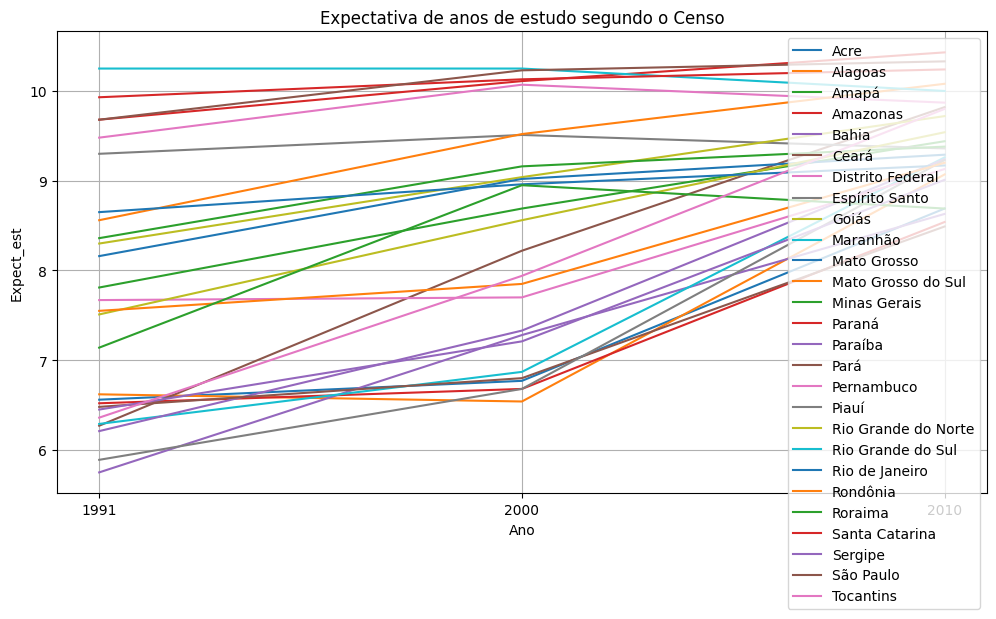

In [58]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in exp_estudo_censo_est.groupby('Territorialidades'):
    plt.plot(dados_território['Ano'], dados_território['Expect_est'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Expectativa de anos de estudo segundo o Censo')
plt.xlabel('Ano')
plt.ylabel('Expect_est')
plt.legend()
plt.grid(True)

plt.show()

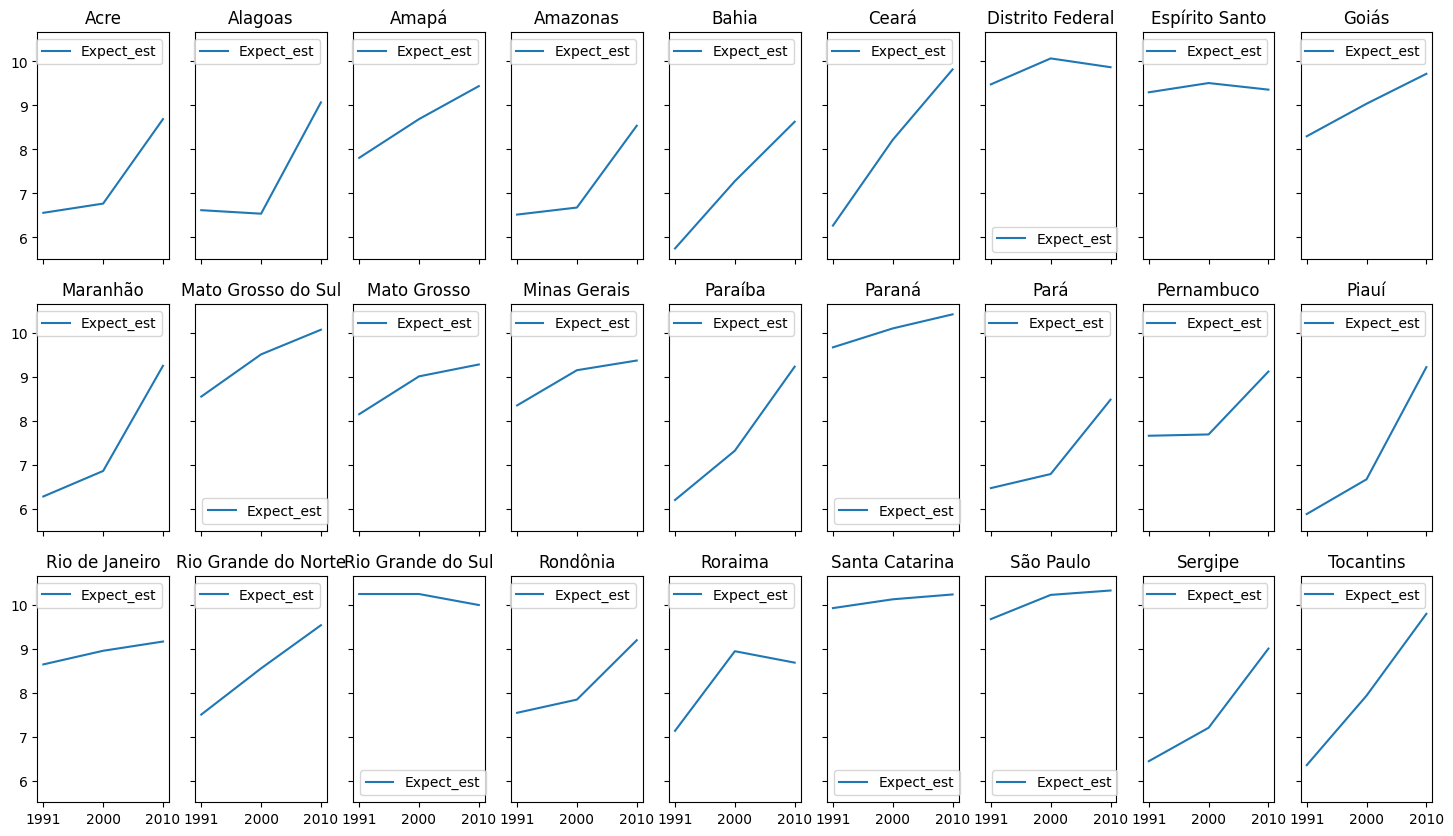

In [59]:
# Obter lista de unidades territoriais únicas
unidades_territoriais = exp_estudo_censo_est['Territorialidades'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = exp_estudo_censo_est[exp_estudo_censo_est['Territorialidades'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='Expect_est', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [60]:
#criando arquivo csv final
exp_estudo_censo_est.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\exp_estudo_censo_est.csv', encoding='UTF-8')